## Simple Linear Regression

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/Github/dsKal100

/content/drive/MyDrive/Github/dsKal100


In [ ]:
!ls

 cs-231n-python-colab.ipynb   lec
 disc			      other
 grad_proj		      proj
 hw			     'python-tutorial for cs231n Stanford.ipynb'
 lab			      README.md


In [ ]:
%cd lec/lec12
!ls

/content/drive/MyDrive/Github/dsKal100/lec/lec12
hi.png	lec12.html  lec12.ipynb


### Model Training and Prediction Using Derived Formulas

In [ ]:
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np

Consider the `tips` dataset. Each row represents one table that ate at a restaurant. For example, the top row of the table was a table for 2 eating dinner on a Sunday, where the person who paid the check was female and not a smoker. This table had a \\$16.99 total bill, and they tipped \\$1.01.

In [ ]:
df = sns.load_dataset("tips")
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In many cultures, it is customary to tip based on the total bill. This data appears to have been collected from such a culture.

In [ ]:
px.scatter(df, x = "total_bill", y = "tip")

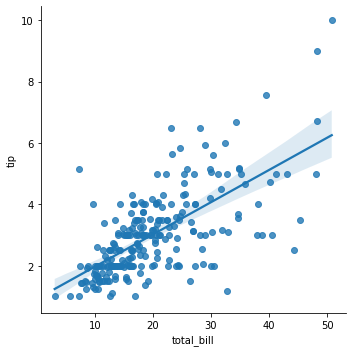

In [ ]:
sns.lmplot(data=df, x="total_bill", y="tip")

Suppose we want to create a linear regression model that predicts the tip from the total bill.

$$\hat{y} = a + b x$$

Let $\hat{a}$ and $\hat{b}$ be the choices that minimize the mean squared error.

One approach to compute $\hat{a}$ and $\hat{b}$ is to use the equations that Lisa derived in the supplementary video for Lecture 9: https://docs.google.com/presentation/d/1SnfnL2A0EvSyEYXG_15YYUnP1u-xISkNrholjdaQKbg/edit#slide=id.g115cefd43df_3_197

$$\hat{a} = \bar{y} - \hat{b} \bar{x}$$

$$\hat{b} = r \frac{\sigma_y}{\sigma_x}$$

$$r = \frac{1}{n} \sum_{i=1}^{n}\left( \frac{x_i - x}{\sigma_x} \right) \left( \frac{y_i - y}{\sigma_y} \right) $$

In [ ]:
y = df["tip"]
x = df["total_bill"]
y_bar = np.mean(y)
x_bar = np.mean(x)
sigma_y = np.std(y)
sigma_x = np.std(x)
r = np.sum((x - x_bar) / sigma_x * (y - y_bar) / sigma_y) / len(x)
b_hat = r * sigma_y / sigma_x
a_hat = y_bar - b_hat * x_bar

In [ ]:
b_hat = r * sigma_y / sigma_x
b_hat

0.10502451738435341

In [ ]:
a_hat = y_bar - b_hat * x_bar
a_hat

0.9202696135546722

Let's look at the accuracy of this model.

In [ ]:
df["predicted_tip"] = a_hat + b_hat * df["total_bill"]

In [ ]:
df.head(10)

,total_bill,tip,sex,smoker,day,time,size,predicted_tip
0,16.99,1.01,Female,No,Sun,Dinner,2,2.704636
1,10.34,1.66,Male,No,Sun,Dinner,3,2.006223
2,21.01,3.50,Male,No,Sun,Dinner,3,3.126835
3,23.68,3.31,Male,No,Sun,Dinner,2,3.407250
4,24.59,3.61,Female,No,Sun,Dinner,4,3.502822
5,25.29,4.71,Male,No,Sun,Dinner,4,3.576340
6,8.77,2.00,Male,No,Sun,Dinner,2,1.841335
7,26.88,3.12,Male,No,Sun,Dinner,4,3.743329
8,15.04,1.96,Male,No,Sun,Dinner,2,2.499838
9,14.78,3.23,Male,No,Sun,Dinner,2,2.472532


In [ ]:
df["residual"] = df["tip"] - df["predicted_tip"]

In [ ]:
df.head(10)

,total_bill,tip,sex,smoker,day,time,size,predicted_tip,residual
0,16.99,1.01,Female,No,Sun,Dinner,2,2.704636,-1.694636
1,10.34,1.66,Male,No,Sun,Dinner,3,2.006223,-0.346223
2,21.01,3.50,Male,No,Sun,Dinner,3,3.126835,0.373165
3,23.68,3.31,Male,No,Sun,Dinner,2,3.407250,-0.097250
4,24.59,3.61,Female,No,Sun,Dinner,4,3.502822,0.107178
5,25.29,4.71,Male,No,Sun,Dinner,4,3.576340,1.133660
6,8.77,2.00,Male,No,Sun,Dinner,2,1.841335,0.158665
7,26.88,3.12,Male,No,Sun,Dinner,4,3.743329,-0.623329
8,15.04,1.96,Male,No,Sun,Dinner,2,2.499838,-0.539838
9,14.78,3.23,Male,No,Sun,Dinner,2,2.472532,0.757468


We can compute the mean squared error:

In [ ]:
np.mean(df["residual"]**2)

1.036019442011377

In [ ]:
np.sqrt(np.mean(df["residual"]**2))

#about a dollar error on average

1.0178504025697377

The sklearn package (more on that soon) provides a function that computes the MSE from a list of observations and predictions.

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(df["tip"], df["predicted_tip"])

1.036019442011377

We can also visualize the output of the model:

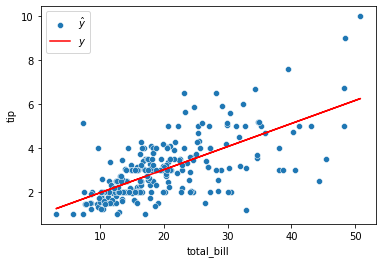

In [ ]:
sns.scatterplot(data = df, x = "total_bill", y = "tip")
plt.plot(df["total_bill"], df["predicted_tip"], 'r')
plt.legend(['$\hat{y}$', '$y$']);

Or in plotly:

In [ ]:
import plotly.graph_objects as go

scatter_plot = px.scatter(df, x="total_bill", y="tip")
line_plot = px.line(df, x="total_bill", y="predicted_tip")
line_plot.update_traces(line=dict(color = 'rgba(255, 0, 0)'))

go.Figure(data=scatter_plot.data + line_plot.data)

### Simple Linear Regression Model Training and Prediction Using sklearn

An alternate approach to optimize our model is to use the `sklearn.linear_model.LinearRegression` class.

In [ ]:
#import linear regression class
from sklearn.linear_model import LinearRegression 

First we create a model. At this point it is like a baby, knowing nothing.

In [ ]:
model = LinearRegression()

Then we "fit" the model, which means computing the parameters that minimize the loss function. The `LinearRegression` class is hard coded to use the MSE as its loss function. The first argument of the fit function should be a **matrix (or DataFrame)**, and the second should be the observation we're trying to predict, which in this case is a series of tip values.

In [ ]:
model.fit(df[["total_bill"]], df["tip"])

LinearRegression()

Now that our model is trained, we can ask it questions. The code below asks the model to estimate the tip for a table with a 20 dollar total bill.

In [ ]:
model.predict([[20]])  #we get an error here because we just gave a number vice a number and name?

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([3.02075996])

In [ ]:
model.predict(df[["total_bill"]])

array([2.70463616, 2.00622312, 3.12683472, 3.40725019, 3.5028225 ,
       3.57633966, 1.84133463, 3.74332864, 2.49983836, 2.47253198,
       1.99887141, 4.6234341 , 2.53974767, 2.85587147, 2.47778321,
       3.1866987 , 2.00517288, 2.631119  , 2.70253567, 3.0890259 ,
       2.80230897, 3.05121707, 2.57650625, 5.06033609, 3.00185555,
       2.79075627, 2.32444741, 2.25303074, 3.19930164, 2.98400138,
       1.92325375, 2.84746951, 2.50193885, 3.09322688, 2.78760553,
       3.4471595 , 2.63321949, 2.69833469, 2.88317784, 4.20438627,
       2.60486287, 2.75399769, 2.38431139, 1.93690694, 4.11301494,
       2.84116804, 3.25496464, 4.32306398, 3.91871958, 2.81491191,
       2.23727706, 2.0009719 , 4.57617306, 1.96421332, 3.60469628,
       2.96719746, 4.91225152, 3.69396712, 2.10074519, 5.98980307,
       3.05121707, 2.3706582 , 2.0776398 , 2.84116804, 2.76765087,
       3.02916192, 2.64792292, 1.24269488, 3.0449156 , 2.49668762,
       2.18266431, 2.71303813, 3.74122815, 3.57528941, 2.46728

We can also ask the model to generate a series of predictions:

In [ ]:
df["sklearn_predictions"] = model.predict(df[["total_bill"]])

Looking at the predictions, we see that they are exactly the same as we got using Lisa's formula.

In [ ]:
df.head(10)

,total_bill,tip,sex,smoker,day,time,size,predicted_tip,residual,sklearn_predictions
0,16.99,1.01,Female,No,Sun,Dinner,2,2.704636,-1.694636,2.704636
1,10.34,1.66,Male,No,Sun,Dinner,3,2.006223,-0.346223,2.006223
2,21.01,3.50,Male,No,Sun,Dinner,3,3.126835,0.373165,3.126835
3,23.68,3.31,Male,No,Sun,Dinner,2,3.407250,-0.097250,3.407250
4,24.59,3.61,Female,No,Sun,Dinner,4,3.502822,0.107178,3.502822
5,25.29,4.71,Male,No,Sun,Dinner,4,3.576340,1.133660,3.576340
6,8.77,2.00,Male,No,Sun,Dinner,2,1.841335,0.158665,1.841335
7,26.88,3.12,Male,No,Sun,Dinner,4,3.743329,-0.623329,3.743329
8,15.04,1.96,Male,No,Sun,Dinner,2,2.499838,-0.539838,2.499838
9,14.78,3.23,Male,No,Sun,Dinner,2,2.472532,0.757468,2.472532


We can ask the model for its intercept and slope with `_intercept` and `_coef`. They are the same as with Lisa's formula.

In [ ]:
model.intercept_

0.9202696135546731

In [ ]:
#model.intercept()  #????

In [ ]:
model.coef_

array([0.10502452])

## Multiple Linear Regression

### Model Training and Prediction Using sklearn

Let's start by removing the columns we added earlier.

In [ ]:
df = df.drop(["predicted_tip", "residual", "sklearn_predictions"], axis = "columns")

Now suppose we want to compute the tip using both the total_bill and the size of the party. We can do this easily in sklearn.

In [ ]:
model_2d = LinearRegression()

In [ ]:
model_2d.fit(df[["total_bill", "size"]], df["tip"])

LinearRegression()

Now that we have this model, we can make predictions. For example, we can ask our model about the tip for a table with a total bill of 10 dollars and 3 customers.

In [ ]:
model_2d.predict([[10, 3]])

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([2.17387149])

Note that this prediction is different than our first model:

In [ ]:
model.predict([[10]])

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([1.97051479])

### Prediction Using the Derived Equation for a 2D Linear Regression Model 

The equation used by this model is the multiple linear regression model described by Lisa in this slide: https://docs.google.com/presentation/d/15eEbroVt2r36TXh28C2wm6wgUHlCBCsODR09kLHhDJ8/edit#slide=id.g113dfce000f_0_1309

$$\hat{y} = \theta_0 + \theta_1 x_1 + \theta_2 x_2$$


We can get $\theta_0$ with `intercept_` and $\theta_1$ and $\theta_2$ with `coef_`

In [ ]:
print(f"theta0: {model_2d.intercept_}")
print(f"theta1 and theta2: {model_2d.coef_}")

theta0: 0.6689447408125022
theta1 and theta2: [0.09271334 0.19259779]


We can manually compute the model prediction as follows:

In [ ]:
0.6689 + 0.0927 * 10 + 0.1926 * 3

2.1737

### Prediction Using the Matrix Form for a Multiple Linear Regression Model

We can also manually compute the predictions using matrix multiplication, using the equation from https://docs.google.com/presentation/d/15eEbroVt2r36TXh28C2wm6wgUHlCBCsODR09kLHhDJ8/edit#slide=id.g113dfce000f_0_1309:

$$ \hat{\mathbb{Y}} = \mathbb{X} \theta$$

In [ ]:
theta = np.array([[0.6689, 0.0927, 0.1926]]).T
theta

array([[0.6689],
       [0.0927],
       [0.1926]])

In [ ]:
X = np.array([[1, 10, 3]])
X

array([[ 1, 10,  3]])

In [ ]:
X @ theta  #tip for a table with a total bill of 10 dollars and 3 customers, as above; get thge same answer

array([[2.1737]])

Using the matrix form we can make many peredictions at once, for example, let X be the first four observations from our dataset:

In [ ]:
X = df[["total_bill", "size"]].head(4)
X

,total_bill,size
0,16.99,2
1,10.34,3
2,21.01,3
3,23.68,2


If we try to use matrix multiplication, we run into an error.

In [ ]:
# uncomment this line
#X.values @ theta 

What's missing is our bias term:

In [ ]:
X = df[["total_bill", "size"]].head(4)
X["bias"] = [1, 1, 1, 1]
X = X[["bias", "total_bill", "size"]] #bias col was added at the back
X

,bias,total_bill,size
0,1,16.99,2
1,1,10.34,3
2,1,21.01,3
3,1,23.68,2


In [ ]:
X @ theta

,0
0,2.629073
1,2.205218
2,3.194327
3,3.249236


These are the same values that we get if we use `.predict`.

In [ ]:
model_2d.predict(X[["total_bill", "size"]].head(4))

array([2.62933992, 2.20539403, 3.19464533, 3.24959215])

### Visualizing Our 2D Linear Model Predictions

Text(0.5, 0.5, 'size')

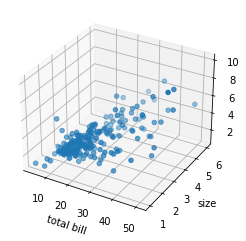

In [ ]:
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df["total_bill"], df["size"], df["tip"])
plt.xlabel('total bill')
plt.ylabel('size')

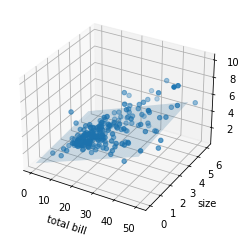

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df["total_bill"], df["size"], df["tip"])
xx, yy = np.meshgrid(range(50), range(6))
zz = ( 0.6689 + 0.0927 * xx + 0.1926 * yy)
ax.plot_surface(xx, yy, zz, alpha=0.2)
plt.xlabel('total bill')
plt.ylabel('size')
plt.gcf().savefig("hi.png", dpi = 300, bbox_inches = "tight")

We see that the predictions all lie in a plane. In higher dimensions, they all lie in a "hyperplane". 

### Multiple Linear Regression Model Training Using the Derived Matrix Formula

For our one dimensional model, we computed $\hat{a}$ and $\hat{b}$ using the equations for simple linear regression.

For a multi-dimensional model we can use the normal equation, which Lisa derived: https://docs.google.com/presentation/d/15eEbroVt2r36TXh28C2wm6wgUHlCBCsODR09kLHhDJ8/edit#slide=id.g113dfce000f_0_2682

$$\hat{\theta} = \left( \mathbb{X}^T \mathbb{X} \right)^{-1} \mathbb{X}^T \mathbb{Y}$$

Note that this derivation is one of the most challenging in the course, especially for those of you who are learning linear algebra during the same semester.

In [ ]:
X = df[["total_bill", "size"]].copy()
X["bias"] = np.ones(len(X))
X = X[["bias", "total_bill", "size"]]
X.head(4)

,bias,total_bill,size
0,1.0,16.99,2
1,1.0,10.34,3
2,1.0,21.01,3
3,1.0,23.68,2


In [ ]:
Y = df[["tip"]]
Y.head(4)

,tip
0,1.01
1,1.66
2,3.50
3,3.31


The optimal parameters we computed using sklearn were:

In [ ]:
theta

array([[0.6689],
       [0.0927],
       [0.1926]])

And if we use the normal equation, we get back:

$$\hat{\theta} = \left( \mathbb{X}^T \mathbb{X} \right)^{-1} \mathbb{X}^T \mathbb{Y}$$

In [ ]:
theta_using_normal_equation = np.linalg.inv(X.T @ X) @ X.T @ Y
theta_using_normal_equation.values

array([[0.66894474],
       [0.09271334],
       [0.19259779]])

In [ ]:
theta_using_normal_equation  #np labels this column "tip", but it's not really "tip" -- just an artifact of matrix mult

,tip
0,0.668945
1,0.092713
2,0.192598


Note: The code above is inefficient. We won't go into this in our class, but it's better to use `np.linalg.solve` rather than computing the explicit matrix inverse.

Note also: sklearn does NOT use the normal equation, instead it uses a procedure called gradient descent which can minimize ANY function, not just the MSE. The rest of the lecture will explain how gradient descent works.

## Minimizing an Arbitrary 1D Function

Suppose we want to find the minimum of the arbitrary function given below:

In [ ]:
def arbitrary(x):
    return (x**4 - 15*x**3 + 80*x**2 - 180*x + 144)/10

x = np.linspace(1, 6.75, 200)
fig = px.line(y = arbitrary(x), x = x)


fig.update_layout(font_size = 16)

One way to minimize this mathematical function is to use the `scipy.optimize.minimize` function. It takes a function and a starting guess and tries to find the minimum.

In [ ]:
from scipy.optimize import minimize

minimize(arbitrary, x0 = 4.5)

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: -0.6914096788766187
        x: [ 5.326e+00]
      nit: 5
      jac: [ 0.000e+00]
 hess_inv: [[ 4.738e-01]]
     nfev: 14
     njev: 7

Our choice of start point can affect the outcome. For example if we start to the left, we get stuck in the local minimum on the left side.

In [ ]:
minimize(arbitrary, x0 = 1)

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: -0.13827491294422317
        x: [ 2.393e+00]
      nit: 7
      jac: [-3.800e-07]
 hess_inv: [[ 7.475e-01]]
     nfev: 16
     njev: 8

`scipy.optimize.minimize` is great. It may also seem a bit magical. How could you write a function that can find the minimum of any mathematical function? There are a number of ways to do this, which we'll explore in today's lecture, eventually arriving at the important idea of **gradient descent**, which is the principle that `scipy.optimize.minimize` uses.

It turns out that under the hood, the `fit` method for `LinearRegression` models **uses gradient descent**. Gradient descent is also how much of machine learning works, including even advanced neural network models. 

In DS100, the gradient descent process will usually be invisible to us, hidden beneath an abstraction layer. However, to be good data scientists, it's important that we know the basic principles beyond the optimization functions that harness to find optimal parmaeters.

### The Naive Approach: Guess and Check

Above, we saw that the minimum is somewhere around 5.3ish. Let's see if we can figure out how to find the exact minimum algorithmically from scratch.

One way very slow and terrible way would be manual guess-and-check.

In [ ]:
arbitrary(5)  #do this over an over

-0.6

A somewhat better approach is to use brute force to try out a bunch of x values and return the one that yields the lowest loss.

In [ ]:
def simple_minimize(f, xs):
    y = [f(x) for x in xs]  
    return xs[np.argmin(y)]

In [ ]:
simple_minimize(arbitrary, np.linspace(1, 7, 20))

5.421052631578947

This process is essentially the same as before where we made a graphical plot, it's just that we're only looking at 20 selected points.

In [ ]:
xs = np.linspace(1, 7, 200)
sparse_xs = np.linspace(1, 7, 5)

ys = arbitrary(xs)
sparse_ys = arbitrary(sparse_xs)

fig = px.line(x = xs, y = arbitrary(xs))
fig.add_scatter(x = sparse_xs, y = arbitrary(sparse_xs), mode = "markers")
fig.update_layout(showlegend= False)
fig.show()

This basic approach suffers from three major flaws:
1. If the minimum is outside our range of guesses, the answer will be completely wrong.
2. Even if our range of guesses is correct, if the guesses are too coarse, our answer will be inaccurate.
3. It is absurdly computationally inefficient, considering potentially vast numbers of guesses that are useless.

### Better Approach: Gradient Descent

Instead of choosing all of our guesses ahead of time, we can instead start from a single guess and try to iteratively improve on our choice. 

They key insight is this: If the derivative of the function is negative, that means the function is decreasing, so we should go to the right (i.e. pick a bigger x). If the derivative of the function is positive, that means the function is increasing, so we should go to the left (i.e. pick a smaller x).

Thus, the derivative tells us which way to go.

In [ ]:
#desmos demo: https://www.desmos.com/calculator/twpnylu4lr

In [ ]:
import plotly.graph_objects as go

def derivative_arbitrary(x):
    return (4*x**3 - 45*x**2 + 160*x - 180)/10


fig = go.Figure()
roots = np.array([2.3927, 3.5309, 5.3263])

fig.add_trace(go.Scatter(x = xs, y = arbitrary(xs), 
                         mode = "lines", name = "f"))
fig.add_trace(go.Scatter(x = xs, y = derivative_arbitrary(xs), 
                         mode = "lines", name = "df", line = {"dash": "dash"}))
fig.add_trace(go.Scatter(x = np.array(roots), y = 0*roots, 
                         mode = "markers", name = "df = zero", marker_size = 12))
fig.update_layout(font_size = 20, yaxis_range=[-1, 3])
fig.show()

In [ ]:
import matplotlib.pyplot as plt

def plot_arbitrary():
    x = np.linspace(1, 7, 100)
    plt.plot(x, arbitrary(x))
    axes = plt.gca()
    axes.set_ylim([-1, 3])
    
def plot_x_on_f(f, x):
    y = f(x)    
    default_args = dict(label=r'$ \theta $', zorder=2,
                        s=200, c=sns.xkcd_rgb['green'])
    plt.scatter([x], [y], **default_args)
    
def plot_x_on_f_empty(f, x):
    y = f(x)
    default_args = dict(label=r'$ \theta $', zorder=2,
                        s=200, c = 'none', edgecolor=sns.xkcd_rgb['green'])
    plt.scatter([x], [y], **default_args)    
    
def plot_tangent_on_f(f, x, eps=1e-6):
    slope = ((f(x + eps) - f(x - eps))
             / (2 * eps))
    xs = np.arange(x - 1, x + 1, 0.05)
    ys = f(x) + slope * (xs - x)
    plt.plot(xs, ys, zorder=3, c=sns.xkcd_rgb['green'], linestyle='--')    

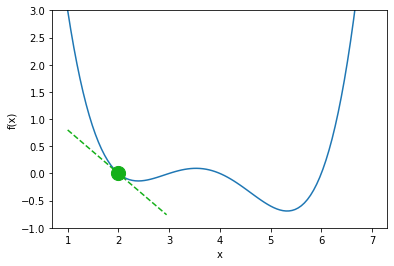

In [ ]:
plot_arbitrary()
plot_x_on_f(arbitrary, 2)
plot_tangent_on_f(arbitrary, 2)
plt.xlabel('x')
plt.ylabel('f(x)');

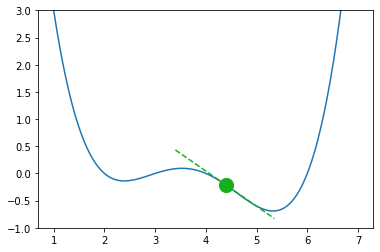

In [ ]:
plot_arbitrary()
plot_x_on_f(arbitrary, 4.4)
plot_tangent_on_f(arbitrary, 4.4)

## Manually Descending the Gradient

Armed with this knowledge, let's try to see if we can use the derivative to optimize the function.

In [ ]:
guess = 4
print(f"x: {guess}, f(x): {arbitrary(guess)}, derivative f'(x): {derivative_arbitrary(guess)}")

x: 4, f(x): 0.0, derivative f'(x): -0.4


In [ ]:
guess = 4 + 0.4
print(f"x: {guess}, f(x): {arbitrary(guess)}, derivative f'(x): {derivative_arbitrary(guess)}")

x: 4.4, f(x): -0.21504000000003315, derivative f'(x): -0.6464000000000055


In [ ]:
def plot_one_step(x):
    new_x = x - derivative_arbitrary(x)
    plot_arbitrary()
    plot_x_on_f(arbitrary, new_x)
    plot_x_on_f_empty(arbitrary, x)
    print(f'old x: {x}')
    print(f'new x: {new_x}')    

old x: 4
new x: 4.4


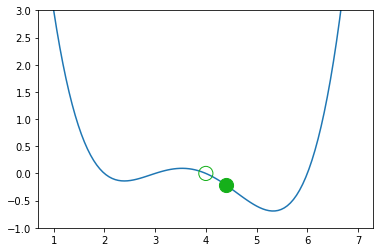

In [ ]:
plot_one_step(4)

old x: 4.4
new x: 5.0464000000000055


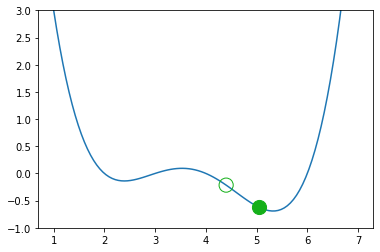

In [ ]:
plot_one_step(4.4)

old x: 5.0464
new x: 5.49673060106241


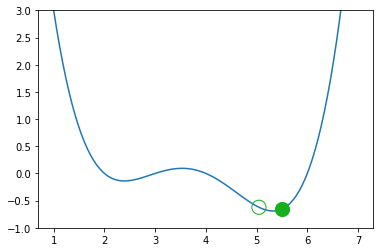

In [ ]:
plot_one_step(5.0464)

old x: 5.4967
new x: 5.080917145374805


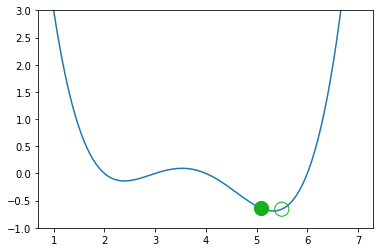

In [ ]:
plot_one_step(5.4967)

old x: 5.080917145374805
new x: 5.489966698640582


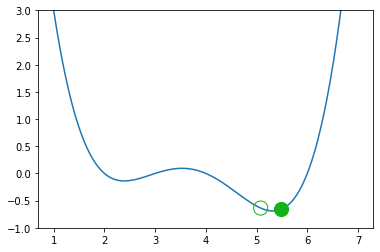

In [ ]:
plot_one_step(5.080917145374805)

old x: 5.489966698640582
new x: 5.092848945470474


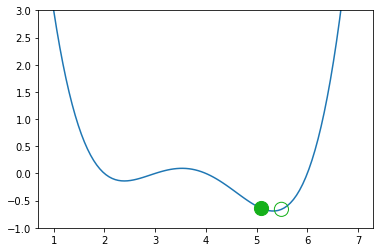

In [ ]:
plot_one_step(5.489966698640582)

In [ ]:
def plot_one_step_better(x):
    new_x = x - 0.3 * derivative_arbitrary(x)
    plot_arbitrary()
    plot_x_on_f(arbitrary, new_x)
    plot_x_on_f_empty(arbitrary, x)
    print(f'old x: {x}')
    print(f'new x: {new_x}')    

old x: 4
new x: 4.12


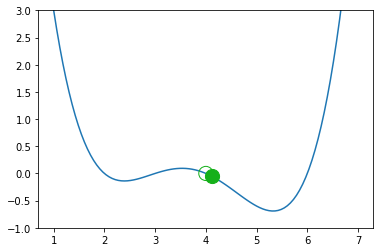

In [ ]:
plot_one_step_better(4)

old x: 4.12
new x: 4.267296639999997


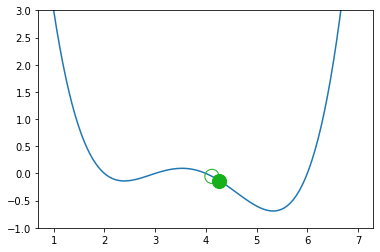

In [ ]:
plot_one_step_better(4.12)

old x: 5.17180969114245
new x: 5.256374838146257


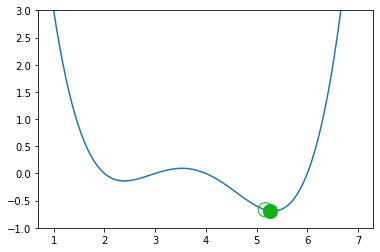

In [ ]:
plot_one_step_better(5.17180969114245)

old x: 5.323
new x: 5.325108157959999


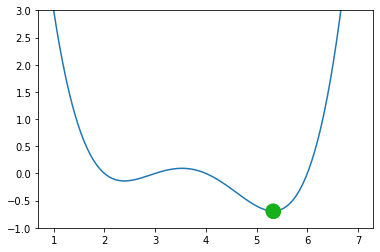

In [ ]:
plot_one_step_better(5.323)

## Gradient Descent as an Algorithmic Procedure in Code

Written as a recurrence relation, the process we've described above is:

$$
x^{(t+1)} = x^{(t)} -  0.3 \frac{d}{dx} f(x)
$$

This algorithm is also known as "gradient descent". 

Given a current $x$, gradient descent creates its next guess for $x$ based on the sign and magnitude of the derivative.

Our choice of 0.3 above was totally arbitrary. Naturally, we can generalize by replacing it with a parameter, typically represented by $\alpha$, and often called the "learning rate".

$$
x^{(t+1)} = x^{(t)} -  \alpha \frac{d}{dx} f(x)
$$

We can also write up this procedure in code as given below:

In [ ]:
def gradient_descent(df, initial_guess, alpha, n):
    """Performs n steps of gradient descent on df using learning rate alpha starting
       from initial_guess. Returns a numpy array of all guesses over time."""
    guesses = [initial_guess]
    current_guess = initial_guess
    while len(guesses) < n:
        current_guess = current_guess - alpha * df(current_guess)
        guesses.append(current_guess)
        
    return np.array(guesses)

In [ ]:
trajectory = gradient_descent(derivative_arbitrary, 4, 0.3, 50)
trajectory

array([4.        , 4.12      , 4.26729664, 4.44272584, 4.64092624,
       4.8461837 , 5.03211854, 5.17201478, 5.25648449, 5.29791149,
       5.31542718, 5.3222606 , 5.32483298, 5.32578765, 5.32614004,
       5.32626985, 5.32631764, 5.32633523, 5.3263417 , 5.32634408,
       5.32634495, 5.32634528, 5.32634539, 5.32634544, 5.32634545,
       5.32634546, 5.32634546, 5.32634546, 5.32634546, 5.32634546,
       5.32634546, 5.32634546, 5.32634546, 5.32634546, 5.32634546,
       5.32634546, 5.32634546, 5.32634546, 5.32634546, 5.32634546,
       5.32634546, 5.32634546, 5.32634546, 5.32634546, 5.32634546,
       5.32634546, 5.32634546, 5.32634546, 5.32634546, 5.32634546])

In [ ]:
trajectory = gradient_descent(derivative_arbitrary, 4, 1, 50) #hops around the answer more
trajectory

array([4.        , 4.4       , 5.0464    , 5.4967306 , 5.08086249,
       5.48998039, 5.09282487, 5.48675539, 5.09847285, 5.48507269,
       5.10140255, 5.48415922, 5.10298805, 5.48365325, 5.10386474,
       5.48336998, 5.1043551 , 5.48321045, 5.10463112, 5.48312031,
       5.10478703, 5.48306928, 5.10487528, 5.48304036, 5.10492528,
       5.48302397, 5.10495363, 5.48301467, 5.1049697 , 5.48300939,
       5.10497883, 5.4830064 , 5.104984  , 5.4830047 , 5.10498694,
       5.48300374, 5.1049886 , 5.48300319, 5.10498955, 5.48300288,
       5.10499009, 5.4830027 , 5.10499039, 5.4830026 , 5.10499056,
       5.48300255, 5.10499066, 5.48300252, 5.10499072, 5.4830025 ])

Below, we see a visualization of the trajectory taken by this algorithm.

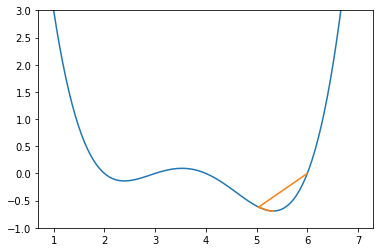

In [ ]:
trajectory = gradient_descent(derivative_arbitrary, 6.0, 0.4, 20)
plot_arbitrary()
plt.plot(trajectory, arbitrary(trajectory));

Above, we've simply run our algorithm a fixed number of times. More sophisticated implementations will stop based on a variety of different stopping criteria, e.g. error getting too small, error getting too large, etc. We will not discuss these in our course.

In the next part, we'll return to the world of real data and see how this procedure might be useful for optimizing models.

## Linear Regression With No Offset

Let's consider a case where we have a linear model with no offset. 

$$\hat{y} = \theta_1 x$$

We want to find the parameter $\theta_1$ such that the L2 loss is minimized. In sklearn, this is easy. To avoid fitting an intercept, we set `fit_intercept` to false.

In [ ]:
model = LinearRegression()
model.fit(df[["total_bill"]], df["tip"])
model.coef_, model.intercept_

(array([0.10502452]), 0.9202696135546731)

In [ ]:
model = LinearRegression(fit_intercept = False)
model.fit(df[["total_bill"]], df["tip"])
model.coef_

array([0.1437319])

The optimal tip percentage is 14.37%.

#### Creating an Explicit MSE Function

To employ gradient descent and do this ourselves, we need to define a function upon which we can use gradient descent.

Suppose we select the L2 loss as our loss function. In this case, our goal will be to minimize the mean squared error. 

Let's start by writing a function that computes the MSE for a given choice of $\theta_1$ on our dataset.

In [ ]:
def mse_loss(theta1, x, y_obs):
    y_hat = theta1 * x
    return np.mean((y_hat - y_obs) ** 2)    

In [ ]:
x = df["total_bill"]
y_obs = df["tip"]
mse_loss(0.147, x, y_obs)

1.1831403511422127

Since `x` and `y_obs` are fixed, the only variable is `theta1`. 

For clarity, let's define a python function that returns the MSE as a function of a single argument `theta1`.

In [ ]:
def mse_single_arg(theta1):
    """Returns the MSE on our data for the given theta1"""
    x = df["total_bill"]
    y_obs = df["tip"]
    y_hat = theta1 * x
    return np.mean((y_hat - y_obs) ** 2) 

In [ ]:
mse_single_arg(0.1437)

1.1781165940051925

#### Brute Forcing our Explicit MSE Function

Thus we can plot the MSE as a function of `theta1`. It turns out to look pretty smooth, and quite similar to a parabola.

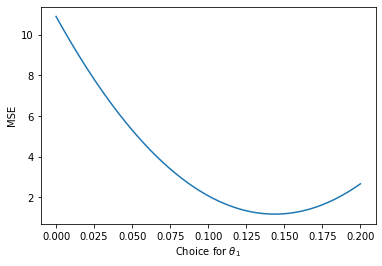

In [ ]:
theta1s = np.linspace(0, 0.2, 200)
x = df["total_bill"]
y_obs = df["tip"]

MSEs = [mse_single_arg(theta1) for theta1 in theta1s]

plt.plot(theta1s, MSEs)
plt.xlabel(r"Choice for $\theta_1$")
plt.ylabel(r"MSE");

The minimum appears to be around $\theta_1 = 0.14$.

Recall our simple_minimize function from earlier, redefined below for your convenience.

In [ ]:
def simple_minimize(f, xs):
    y = [f(x) for x in xs]  
    return xs[np.argmin(y)]

In [ ]:
simple_minimize(mse_single_arg, np.linspace(0, 0.2, 21))

0.14

As before, what we're doing is computing all the starred values below and then returning the $\theta_1$ that goes with the minimum value.

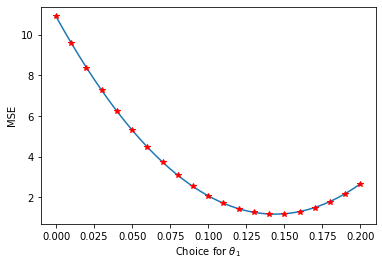

In [ ]:
theta1s = np.linspace(0, 0.2, 200)
sparse_theta1s = np.linspace(0, 0.2, 21)

loss = [mse_single_arg(theta1) for theta1 in theta1s]
sparse_loss = [mse_single_arg(theta1) for theta1 in sparse_theta1s]

plt.plot(theta1s, loss)
plt.plot(sparse_theta1s, sparse_loss, 'r*')
plt.xlabel(r"Choice for $\theta_1$")
plt.ylabel(r"MSE");

#### Using Scipy.Optimize.minimize

In [ ]:
import scipy.optimize
from scipy.optimize import minimize
minimize(mse_single_arg, x0 = 0)

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 1.178116115451325
        x: [ 1.437e-01]
      nit: 1
      jac: [ 3.204e-06]
 hess_inv: [[1]]
     nfev: 6
     njev: 3

#### Using Our Gradient Descent Function

Another approach is to use our 1D gradient descent algorithm from earlier. This is the exact same function as earlier, but copy and pasted to remind you what it looks like.

In [ ]:
def gradient_descent(df, initial_guess, alpha, n):
    """Performs n steps of gradient descent on df using learning rate alpha starting
       from initial_guess. Returns a numpy array of all guesses over time."""
    guesses = [initial_guess]
    current_guess = initial_guess
    while len(guesses) < n:
        current_guess = current_guess - alpha * df(current_guess)
        guesses.append(current_guess)
        
    return np.array(guesses)

To use this function, we need to compute the derivative of the MSE. The MSE is repeated below for convenience.

In [ ]:
def mse_single_arg(theta1):
    """Returns the MSE on our data for the given theta1"""
    x = df["total_bill"]
    y_obs = df["tip"]
    y_hat = theta1 * x
    return np.mean((y_hat - y_obs) ** 2) 

So the derivative is therefore:

$$mse = \frac{1}{n}\sum_i(\hat{y_i} - y_i)^2$$ 

but really, mse is a function of $\theta$ - data are constant!

$$\therefore mse(\theta) = \frac{1}{n}(\sum_i(\theta_1 x_i - y_i)^2$$

$$\frac{d(mse(\theta))}{d\theta_1} = 2\sum_i(\theta_1 x_i - y_i)x_i$$

In [ ]:
def mse_loss_derivative_single_arg(theta_1):
    """Returns the derivative of the MSE on our data for the given theta1"""
    x = df["total_bill"]
    y_obs = df["tip"]
    y_hat = theta_1 * x
    
    return np.mean(2 * (y_hat - y_obs) * x)

In [ ]:
gradient_descent(mse_loss_derivative_single_arg, 0.05, 0.0001, 100)

array([0.05      , 0.05881852, 0.06680736, 0.0740446 , 0.08060095,
       0.08654045, 0.09192116, 0.09679563, 0.10121151, 0.10521192,
       0.10883597, 0.11211906, 0.11509327, 0.11778766, 0.12022855,
       0.1224398 , 0.12444301, 0.12625776, 0.12790176, 0.1293911 ,
       0.13074031, 0.13196259, 0.13306988, 0.13407298, 0.13498172,
       0.13580495, 0.13655074, 0.13722636, 0.13783841, 0.13839289,
       0.13889519, 0.13935024, 0.13976248, 0.14013593, 0.14047425,
       0.14078073, 0.14105839, 0.14130992, 0.14153778, 0.14174421,
       0.14193122, 0.14210063, 0.1422541 , 0.14239314, 0.14251909,
       0.14263319, 0.14273656, 0.1428302 , 0.14291504, 0.14299189,
       0.14306151, 0.14312458, 0.14318172, 0.14323348, 0.14328037,
       0.14332285, 0.14336134, 0.1433962 , 0.14342778, 0.14345639,
       0.14348231, 0.1435058 , 0.14352707, 0.14354634, 0.1435638 ,
       0.14357961, 0.14359394, 0.14360692, 0.14361868, 0.14362933,
       0.14363898, 0.14364772, 0.14365564, 0.14366281, 0.14366

In [ ]:
gradient_descent(mse_loss_derivative_single_arg, 0.05, 0.01, 100) #hops around, but doesn't really converge

array([ 5.00000000e-02,  9.31851523e-01, -6.48296168e+00,  5.58625164e+01,
       -4.68352799e+02,  3.93937179e+03, -3.31218041e+04,  2.78497203e+05,
       -2.34166806e+06,  1.96892924e+07, -1.65552159e+08,  1.39200115e+09,
       -1.17042702e+10,  9.84122327e+10, -8.27472996e+11,  6.95758587e+12,
       -5.85010041e+13,  4.91890081e+14, -4.13592648e+15,  3.47758341e+16,
       -2.92403321e+17,  2.45859529e+18, -2.06724424e+19,  1.73818715e+20,
       -1.46150828e+21,  1.22887024e+22, -1.03326275e+23,  8.68791406e+23,
       -7.30500069e+24,  6.14221489e+25, -5.16451748e+26,  4.34244670e+27,
       -3.65123042e+28,  3.07003967e+29, -2.58136093e+30,  2.17046845e+31,
       -1.82498047e+32,  1.53448613e+33, -1.29023171e+34,  1.08485690e+35,
       -9.12172977e+35,  7.66976306e+36, -6.44891559e+37,  5.42239858e+38,
       -4.55927914e+39,  3.83354820e+40, -3.22333670e+41,  2.71025664e+42,
       -2.27884697e+43,  1.91610766e+44, -1.61110800e+45,  1.35465716e+46,
       -1.13902733e+47,  

In the context of minimizing loss, we can write out the gradient descent rule for generating the next $\theta_1$ as:

$$
\theta_1^{(t+1)} = \theta_1^{(t)} - \alpha \frac{\partial}{\partial \theta_1} L(\theta^{(t)}, \Bbb{X}, \vec{{y}})
$$

Here $L$ is our chosen loss function, $\Bbb{X}$ are the features of our input, and $\vec{{y}}$ are our observations. During the gradient descent algorithm, we treat $\Bbb{X}$ and $\vec{{y}}$ as constants.

## Multi Dimensional Models

Now suppose we improve our model so that we want to predict the tip from the total_bill plus a constant offset, in other words:

$$\textrm{tip} = \theta_0 + \theta_1 \textrm{bill}$$

We know how to do this in sklearn:

In [ ]:
model = LinearRegression(fit_intercept = True)
X = df[["total_bill"]]
y = df["tip"]
model.fit(X, y)

LinearRegression()

In [ ]:
model.coef_

array([0.10502452])

In [ ]:
model.intercept_

0.9202696135546731

### With sklearn (explicit bias column)

To make our lives easier, let's reframe the problem slightly:

In [ ]:
tips_with_bias = df.copy()
tips_with_bias["bias"] = 1
X = tips_with_bias[["bias", "total_bill"]]
X.head(5)

,bias,total_bill
0,1,16.99
1,1,10.34
2,1,21.01
3,1,23.68
4,1,24.59


In [ ]:
model = LinearRegression(fit_intercept = False) #he selects intercept false here because he explicitly added 1s to the matrix
X = tips_with_bias[["bias", "total_bill"]]
y = df["tip"]
model.fit(X, y)

LinearRegression(fit_intercept=False)

In [ ]:
model.coef_

array([0.92026961, 0.10502452])

#### Defining a 2D MSE Function

Now, we can give our predictions as $$\hat{y} = \theta_0 + \theta_1 \times bill$$

For example, the predictions below correspond to assuming every table leaves a tip of \$1.50 plus 5% of their total bill.  (i.e. let's guess that 1.5 and .05 are theta0 and theta1)

In [ ]:
X @ np.array([1.5, 0.05]) 

0      2.3495
1      2.0170
2      2.5505
3      2.6840
4      2.7295
        ...  
239    2.9515
240    2.8590
241    2.6335
242    2.3910
243    2.4390
Length: 244, dtype: float64

Throughout this problem, we'll assume we want to minimize the mean squared error of our predictions, i.e.

In [ ]:
def mse_loss(theta, X, y_obs):
    y_hat = X @ theta
    return np.mean((y_hat - y_obs) ** 2)    

For example, the loss assuming the model described above is:

In [ ]:
mse_loss(np.array([1.5, 0.05]), X, y_obs)

1.5340521752049179

Using this function, we can create a 3D plot. This uses lots of syntax you've never seen.

In [ ]:
import plotly.graph_objects as go

uvalues = np.linspace(0, 2, 10)
vvalues = np.linspace(0, 0.2, 10)
(u,v) = np.meshgrid(uvalues, vvalues)
thetas = np.vstack((u.flatten(),v.flatten()))

def mse_loss_single_arg(theta):
    return mse_loss(theta, X, y_obs)

MSE = np.array([mse_loss_single_arg(t) for t in thetas.T])

loss_surface = go.Surface(x=u, y=v, z=np.reshape(MSE, u.shape))

ind = np.argmin(MSE)
optimal_point = go.Scatter3d(name = "Optimal Point",
    x = [thetas.T[ind,0]], y = [thetas.T[ind,1]], 
    z = [MSE[ind]],
    marker=dict(size=10, color="red"))

fig = go.Figure(data=[loss_surface, optimal_point])
fig.update_layout(scene = dict(
    xaxis_title = "theta0",
    yaxis_title = "theta1",
    zaxis_title = "MSE"))
fig.show()

## Optimizing the 2D Model With Our Own Gradient Descent

Below is the function we just derived (**IN THE LECTURE SLIDES**), but in code.

In [ ]:
def mse_gradient(theta, X, y_obs):
    """Returns the gradient of the MSE on our data for the given theta"""    
    x0 = X.iloc[:, 0]
    x1 = X.iloc[:, 1]
    dth0 = np.mean(-2 * (y_obs - theta[0]*x0 - theta[1]*x1) * x0)
    dth1 = np.mean(-2 * (y_obs - theta[0]*x0 - theta[1]*x1) * x1)
    return np.array([dth0, dth1])

In [ ]:
X = tips_with_bias[["bias", "total_bill"]]
y_obs = tips_with_bias["tip"]
mse_gradient(np.array([0, 0]), X, y_obs)

array([  -5.99655738, -135.22631803])

In [ ]:
def mse_gradient_single_arg(theta):
    """Returns the gradient of the MSE on our data for the given theta"""
    X = tips_with_bias[["bias", "total_bill"]]
    y_obs = tips_with_bias["tip"]
    return mse_gradient(theta, X, y_obs)

In [ ]:
mse_gradient_single_arg(np.array([0, 0]))

array([  -5.99655738, -135.22631803])

In [ ]:
guesses = gradient_descent(mse_gradient_single_arg, np.array([0, 0]), 0.001, 10000)

In [ ]:
pd.DataFrame(guesses).tail(10)

,0,1
9990,0.888098,0.106378
9991,0.888108,0.106378
9992,0.888119,0.106377
9993,0.888130,0.106377
9994,0.888141,0.106376
9995,0.888151,0.106376
9996,0.888162,0.106375
9997,0.888173,0.106375
9998,0.888184,0.106375
9999,0.888194,0.106374


If you play around with the code above, you'll see that it's pretty finicky about the start point and learning rate. 

## Extra

For reference, the general matrix form of the gradient is given below. We have not discussed how to derive this in class.

In [ ]:
def mse_gradient(theta, X, y_obs):
    """Returns the gradient of the MSE on our data for the given theta"""
    n = len(X)
    return -2 / n * (X.T @ y_obs - X.T @ X @ theta)